## 분석 방향성
- 가설: 지역별 키워드 검색량과 관광지 소비량(방문자 수) 간에 상관 관계가 있을 것이다.
- 설명: 지역별로 특정 키워드의 검색량이 높을수록 해당 지역의 소비량이 증가할 것으로 예상됨. 따라서 특정 키워드의 검색량이 소비량과 어떤 관련이 있는지 분석하여 상관 관계를 파악합니다.

- 키워드 검색과 소비량 상관관계 분석
- 문제 정의: 특정 키워드 검색량과 소비량 간의 상관성을 파악하고 분석합니다.
- 배경: 어떤 키워드 검색이 소비량에 영향을 미치는지 이해하여 마케팅 전략에 반영할 수 있습니다.

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
df_ksearch_date = pd.read_csv("Keyword_search_by_date.csv")
df_Nvisitors_Date = pd.read_csv("Number_of_visitors_date.csv")
df_search_trend = pd.read_csv("Trend_search_date.csv")

In [4]:
df_ksearch_date[:5]

,_id,destination_type,destination_search,region,std_year,std_month,std_year_month
0,65e92d9cbb908e26c804031e,전체,1937279,강원,2020,1,202001
1,65e92d9cbb908e26c804031f,전체,1395025,강원,2020,2,202002
2,65e92d9cbb908e26c8040320,전체,1295467,강원,2020,3,202003
3,65e92d9cbb908e26c8040321,전체,1592147,강원,2020,4,202004
4,65e92d9cbb908e26c8040322,전체,2286676,강원,2020,5,202005


In [5]:
df_ksearch_date['destination_type'].value_counts()

destination_type
전체       816
숙박       816
음식       816
기타관광     816
쇼핑       816
문화관광     816
역사관광     816
자연관광     816
체험관광     816
레저스포츠    816
Name: count, dtype: int64

In [6]:
df_Nvisitors_Date[:5]

,_id,industry_major_cate,std_year_month,std_year,std_month,consumption_amount,region
0,65e932a1bb908e26c804492e,전체,202012,2020,12,59888524,강원
1,65e932a1bb908e26c804492f,전체,202001,2020,1,98147222,강원
2,65e932a1bb908e26c8044930,전체,202002,2020,2,69547139,강원
3,65e932a1bb908e26c8044931,전체,202003,2020,3,62071229,강원
4,65e932a1bb908e26c8044932,전체,202004,2020,4,75022238,강원


In [7]:
df_Nvisitors_Date['industry_major_cate'].value_counts()

industry_major_cate
전체        816
운송업       816
숙박업       816
여가서비스업    816
식음료업      816
쇼핑업       816
여행업       797
Name: count, dtype: int64

In [8]:
df_search_trend[:5]

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740


In [9]:
df_search_trend['tour_trend'].value_counts()

tour_trend
레포츠      816
휴식/힐링    816
기타       816
미식       816
체험       816
Name: count, dtype: int64

In [10]:
df_search_trend['region'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

## 전처리

In [11]:
df_ksearch_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8160 entries, 0 to 8159
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 8160 non-null   object
 1   destination_type    8160 non-null   object
 2   destination_search  8160 non-null   int64 
 3   region              8160 non-null   object
 4   std_year            8160 non-null   int64 
 5   std_month           8160 non-null   int64 
 6   std_year_month      8160 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 446.4+ KB


In [12]:
df_ksearch_date.isnull().sum()

_id                   0
destination_type      0
destination_search    0
region                0
std_year              0
std_month             0
std_year_month        0
dtype: int64

In [13]:
df_Nvisitors_Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  5693 non-null   object
 1   industry_major_cate  5693 non-null   object
 2   std_year_month       5693 non-null   int64 
 3   std_year             5693 non-null   int64 
 4   std_month            5693 non-null   int64 
 5   consumption_amount   5693 non-null   int64 
 6   region               5693 non-null   object
dtypes: int64(4), object(3)
memory usage: 311.5+ KB


In [14]:
df_Nvisitors_Date.isnull().sum()

_id                    0
industry_major_cate    0
std_year_month         0
std_year               0
std_month              0
consumption_amount     0
region                 0
dtype: int64

In [15]:
df_search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             4080 non-null   object
 1   region          4080 non-null   object
 2   std_year_month  4080 non-null   int64 
 3   std_year        4080 non-null   int64 
 4   std_month       4080 non-null   int64 
 5   tour_trend      4080 non-null   object
 6   num_mention     4080 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 223.3+ KB


In [16]:
df_search_trend.isnull().sum()

_id               0
region            0
std_year_month    0
std_year          0
std_month         0
tour_trend        0
num_mention       0
dtype: int64

- 결측치 없음

## EDA

### 제안 1 : 계절별 카테고리 검색량/소비량 비교

- 문제 정의 : 카테고리의 계절별 검색 추이를 시각화하여 계절적 패턴을 확인
- 배경 : 특정 키워드의 검색량이 계절에 따라 변화할 수 있다.
- 예를 들어 여름에는 레저스포츠 관련 키워드의 검색량이 증가할 것으로 예상된다. 이를 통해 계절별 카테고리 검색 추이와 계절적 패턴을 이해할 수 있다.

In [17]:
seasons = {
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
}
df_ksearch_date['season'] = df_ksearch_date['std_month'].map(seasons)
df_Nvisitors_Date['season'] = df_Nvisitors_Date['std_month'].map(seasons)

In [18]:
df_ksearch_date

,_id,destination_type,destination_search,region,std_year,std_month,std_year_month,season
0,65e92d9cbb908e26c804031e,전체,1937279,강원,2020,1,202001,겨울
1,65e92d9cbb908e26c804031f,전체,1395025,강원,2020,2,202002,겨울
2,65e92d9cbb908e26c8040320,전체,1295467,강원,2020,3,202003,봄
3,65e92d9cbb908e26c8040321,전체,1592147,강원,2020,4,202004,봄
4,65e92d9cbb908e26c8040322,전체,2286676,강원,2020,5,202005,봄
...,...,...,...,...,...,...,...,...
8155,65e92d9dbb908e26c80422f9,문화관광,80761,충북,2023,12,202312,겨울
8156,65e92d9dbb908e26c80422fa,역사관광,20072,충북,2023,12,202312,겨울
8157,65e92d9dbb908e26c80422fb,자연관광,25920,충북,2023,12,202312,겨울
8158,65e92d9dbb908e26c80422fc,체험관광,11141,충북,2023,12,202312,겨울


In [19]:
df_ksearch_date = df_ksearch_date.query('destination_type != "전체"')
df_Nvisitors_Date = df_Nvisitors_Date.query('industry_major_cate != "전체"')

In [20]:
# 계절별 데이터 확인
df_ksearch_winter = df_ksearch_date.query('season == "겨울"')
df_ksearch_spring = df_ksearch_date.query('season == "봄"')
df_ksearch_summer = df_ksearch_date.query('season == "여름"')
df_ksearch_fall = df_ksearch_date.query('season == "가을"')

#### 각 계절별 카테고리 검색량/소비량 중앙값(median) 비교 그래프
- 각 검색량/소비량 데이터가 정규분포를 따르지 않으므로 평균값의 비교는 적절하지 않다고 판단. 중앙값 이용

In [21]:
grouped = df_ksearch_date.groupby(['destination_type', 'season'])
cate_season_median = grouped['destination_search'].median().unstack()
cate_season_median

season,가을,겨울,봄,여름
destination_type,,,,
기타관광,184865.0,136141.0,148628.0,175070.5
레저스포츠,64666.5,37991.0,55277.0,63686.5
문화관광,147305.0,92139.5,112278.0,141512.0
쇼핑,111129.5,83361.5,81935.0,94511.0
숙박,169229.5,116849.5,127977.5,187096.5
역사관광,52178.5,33610.0,45328.0,43682.0
음식,519853.0,379345.0,462935.0,548095.0
자연관광,99406.0,60219.5,71325.0,97895.0
체험관광,7361.5,5201.0,6635.0,7429.0


In [22]:
grouped = df_Nvisitors_Date.groupby(['industry_major_cate', 'season'])
df_Nvisitors_median = grouped['consumption_amount'].median().unstack()
df_Nvisitors_median

season,가을,겨울,봄,여름
industry_major_cate,,,,
쇼핑업,27257214.5,22564068.5,25750618.5,23695040.5
숙박업,4730802.5,4057502.5,3871148.5,5202556.5
식음료업,52588623.5,42003533.0,49524472.5,54377820.0
여가서비스업,9336731.0,5334538.0,8816662.0,9482516.0
여행업,28529.0,22598.0,26167.0,34845.0
운송업,162617.0,91903.0,130944.0,146063.5


Text(0.5, 1.0, '계절별 카테고리 검색량')

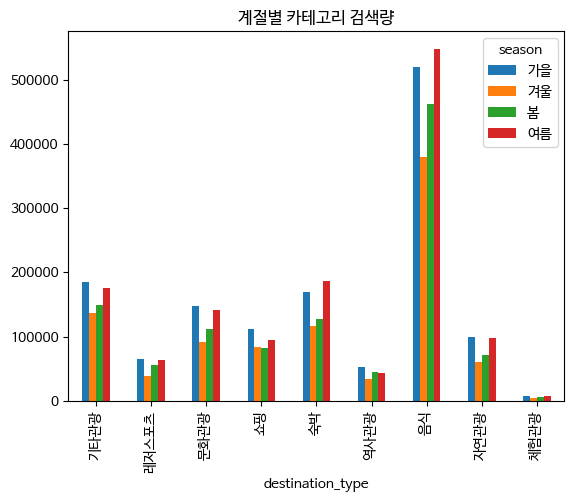

In [23]:
cate_season_median.plot(kind='bar')
plt.title("계절별 카테고리 검색량")

Text(0.5, 1.0, '계절별 카테고리 소비량 ')

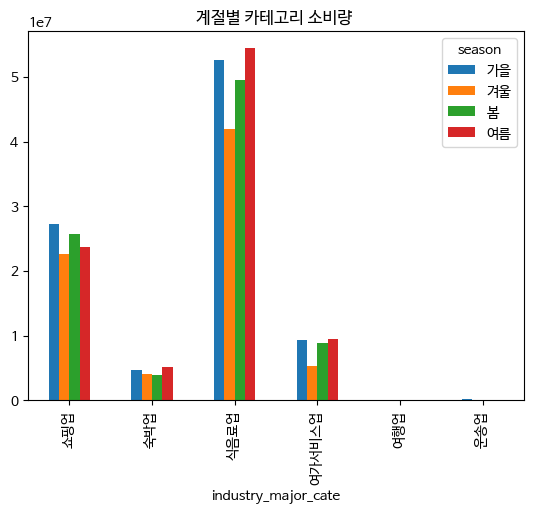

In [24]:
df_Nvisitors_median.plot(kind='bar')
plt.title("계절별 카테고리 소비량 ")

- 계절 전체적으로 겨울의 검색량이 적고, 가을의 검색량이 많다.   --> 가을에 여행을 많이 가고 겨울에는 비교적 적게 간다.
- 카테고리 중 음식(식음료업)의 검색량이 가장 많고, 소비량도 가장 많다.
- 레저스포츠의 경우 전체 계절 중 여름에 검색량이 많을 것으로 예상했으나 가을과 비슷함.
- 숙박과 음식의 경우 가을보다 여름의 검색량이 더 많다.
- 체험관광과 역사관광의 경우 선호도가 떨어진다.
- 쇼핑업은 가을에, 식음료업은 여름에 선호도가 높다.
- 전략 제안 : 사용자가 지역 검색 시, 지역 맛집 추천을 우선으로 한다면 어떨까? 

### 제안 2 : 지역별 여행 트렌드 선호도 분석

- 지역별 카테고리 방문자 선호도 비교: 트렌드 검색량 데이터 이용
- 해당 트렌드(카테고리)에 대한 검색량을 비교하여 선호도를 분석할 수 있습니다.

In [25]:
df_search_trend

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740
...,...,...,...,...,...,...,...
4075,65e92de0bb908e26c8044928,충북,202301,2023,1,체험,868
4076,65e92de0bb908e26c8044929,충북,202302,2023,2,미식,843
4077,65e92de0bb908e26c804492a,충북,202312,2023,12,미식,832
4078,65e92de0bb908e26c804492b,충북,202311,2023,11,미식,797


In [26]:
grouped = df_search_trend.groupby(['region', 'tour_trend'])
trend_median = grouped['num_mention'].median().unstack()
trend_median

tour_trend,기타,레포츠,미식,체험,휴식/힐링
region,,,,,
강원,7998.5,41748.0,2773.0,2998.5,31907.0
경기,18185.5,59539.5,6161.0,5368.5,61038.0
경남,5371.0,26023.5,1425.5,2997.5,20501.5
경북,5084.0,19141.0,1397.0,3417.5,18057.5
광주,1186.0,2701.0,544.5,308.0,3696.0
대구,2991.0,6739.5,1851.5,656.0,9156.5
대전,1483.0,3488.5,1000.5,430.0,4771.0
부산,30374.0,20024.0,5187.5,1853.5,29445.0
서울,24713.0,38781.5,11638.5,3197.0,60961.0


Text(0.5, 1.0, '지역별 카테고리 검색량')

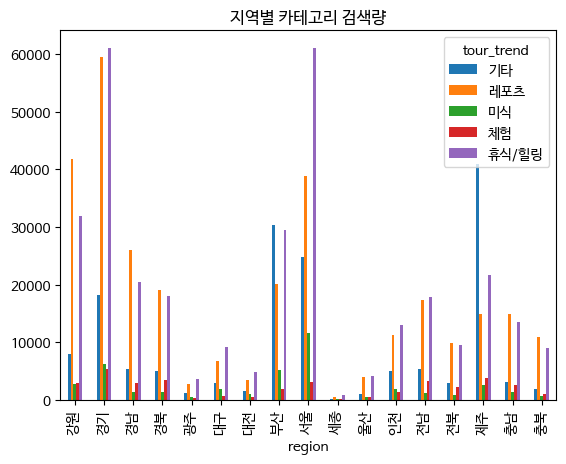

In [27]:
trend_median.plot(kind='bar')
plt.title("지역별 카테고리 검색량")

- 광주, 대구, 대전, 세종, 울산 의 경우 검색량이 적음 -> 여행 지역으로서의 선호도가 떨어짐.
- 전체적으로 레포츠와 휴식/힐링의 검색량이 높게 나타남.
- 서울, 경기, 강원, 부산, 제주 지역의 선호도가 높음
- 부산과 제주는 기타 카테고리의 선호도가 가장 높게 나타남.
- 서울, 경기 지역에서 휴식/힐링 카테고리가 높게 나타나는 점이 의외임. -> 말 그대로 휴식/힐링이 아니라 숙소 검색까지 합친 것이라면 이해됨

- 지역마다의 검색량과 방문자 선호도 분석:
- 데이터셋에 있는 지역 정보를 기반으로 지역별 검색량과 방문자 수를 비교하여 지역마다의 선호도와 관심사를 파악할 수 있습니다.

In [28]:
df_ksearch_sum = pd.pivot_table(data=df_ksearch_date[['destination_search', 'region']]
               , index=['region'], values=['destination_search'], aggfunc= 'sum')
df_ksearch_sum

,destination_search
region,
강원,124018490
경기,475468913
경남,77370296
경북,71565241
광주,22672796
대구,43530309
대전,32832027
부산,82016182
서울,242574722


In [29]:
df_Nvisitors_sum = pd.pivot_table(data=df_Nvisitors_Date[['consumption_amount', 'region']]
               , index=['region'], values=['consumption_amount'], aggfunc= 'sum')
df_Nvisitors_sum

,consumption_amount
region,
강원,4908100260
경기,34914714219
경남,5771857494
경북,4654283535
광주,3537130531
대구,6567972396
대전,5160175157
부산,11162514886
서울,42920026910


Text(0.5, 1.0, '지역 검색량 총 수')

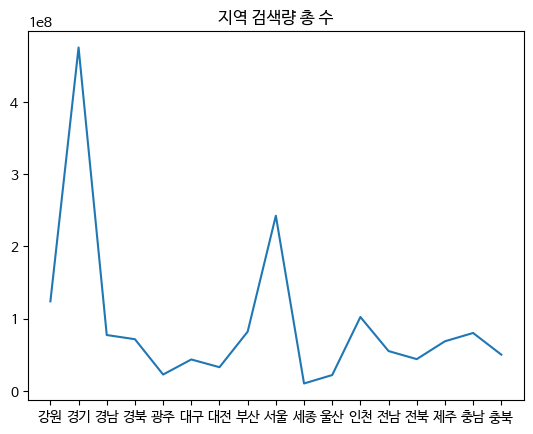

In [30]:
plt.plot(df_ksearch_sum)
plt.title("지역 검색량 총 수")

Text(0.5, 1.0, '지역 방문객 소비량 총 수')

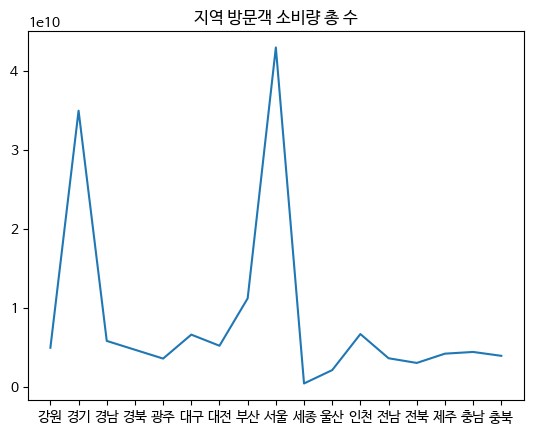

In [31]:
plt.plot(df_Nvisitors_sum)
plt.title("지역 방문객 소비량 총 수")

- 경기 지역의 검색량이 가장 높은 반면 지역 소비량은 서울이 가장 높다.
- 선호도가 가장 낮은 지역 : 세종

### 제안 3 : 연도별 여행 트렌드 선호도 분석

- 연도별 소비자 행동 분석
- 문제 정의: 연도별로 소비자의 행동 변화를 파악하고 향후 전략에 반영할 수 있는 인사이트를 도출합니다.
- 배경: 시간이 지남에 따라 사용자의 관심사와 행동이 변화하기 때문에, 효율적인 타겟팅을 위해 중요한 분석입니다.
- 년도 및 월별 데이터를 활용하여 시계열 분석을 수행하여 어떤 여행 카테고리나 활동이 특정 시기에 더 인기가 있는지 예측할 수 있습니다.

In [32]:
df_search_trend

,_id,region,std_year_month,std_year,std_month,tour_trend,num_mention
0,65e92ddfbb908e26c804393d,강원,202007,2020,7,레포츠,58868
1,65e92ddfbb908e26c804393e,강원,202008,2020,8,레포츠,53624
2,65e92ddfbb908e26c804393f,강원,202006,2020,6,레포츠,49214
3,65e92ddfbb908e26c8043940,강원,202010,2020,10,레포츠,47223
4,65e92ddfbb908e26c8043941,강원,202007,2020,7,휴식/힐링,40740
...,...,...,...,...,...,...,...
4075,65e92de0bb908e26c8044928,충북,202301,2023,1,체험,868
4076,65e92de0bb908e26c8044929,충북,202302,2023,2,미식,843
4077,65e92de0bb908e26c804492a,충북,202312,2023,12,미식,832
4078,65e92de0bb908e26c804492b,충북,202311,2023,11,미식,797


In [36]:
trend_sum = grouped['num_mention'].sum().unstack()
trend_sum

tour_trend,기타,레포츠,미식,체험,휴식/힐링
std_year,,,,,
2020,1843424,2862899,453838,328528,3072938
2021,1606230,3253850,430398,378474,3489159
2022,1942123,3802860,561945,475773,4217134
2023,2447573,4866303,648984,632589,5591034


Text(0.5, 1.0, '연도별 여행 트렌드 총 검색량')

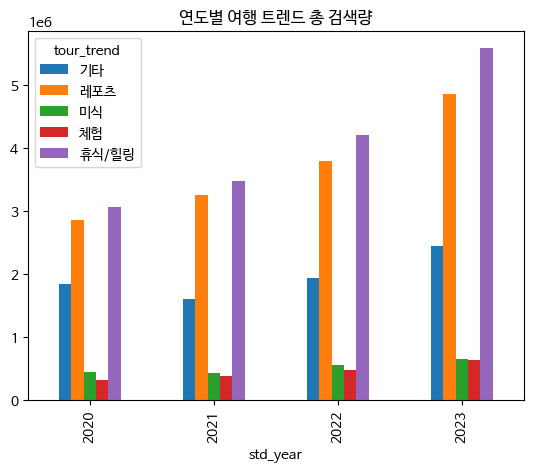

In [38]:
trend_sum.plot(kind='bar')
plt.title("연도별 여행 트렌드 총 검색량")

- 해가 지날수록 여행에 대한 관심이 높아지고 있음.
- 2024년엔 더 높아질 것으로 예상 됨.
- 2020, 2021년엔 레포츠와 휴식/힐링 카테고리의 검색량이 비슷했으나 2022년부터 격차가 벌어짐.
- --> "호캉스"라는 키워드가 떠오르기 시작한 시기라서 검색량이 증가한 것인지 추가 분석을 해볼 수 있겠음.